In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

%matplotlib inline

In [2]:
# 신경망 클래스의 정의
class neuralNetwork:
    
    # 신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # 가증치 행렬 w_{ih} and w_{ho}
        # 배열 내 가중치는 w_i_j로 표기 (노트 i에서 다음 계층의 노드 j로 연결됨 의미)
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습시키기
    def train(self, inputs_list, targets_list):
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        
        # 입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = np.dot(self.wih, inputs)
        # 은닉 계층으로 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [7]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# 학습률
learning_rate = 0.3

# 신경망의 인스턴스 생셩
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("../makeyourownneuralnetwork/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [16]:
# 신경망 학습시키기

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:

    # 레코드를 쉽표에 의해 분리
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 결과 값 생성 (실제 값ㅇ니 0.99 외에는 모두 0.01)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [17]:
# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file = open("../makeyourownneuralnetwork/mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [18]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


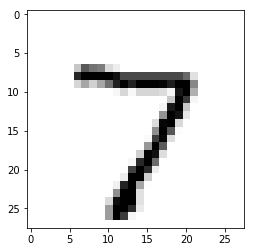

In [19]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [20]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[  4.72838214e-03],
       [  4.19976291e-04],
       [  7.68420184e-03],
       [  8.59205671e-04],
       [  1.00344802e-03],
       [  1.00638062e-02],
       [  3.32256467e-04],
       [  9.84058336e-01],
       [  2.41678045e-03],
       [  8.08949318e-04]])

In [21]:
# 신경망 테스트하기

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 데스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    # 입력값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 큰 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 오답인 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

In [22]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [23]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)   

performance =  0.6
